In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [48]:
mu = 100
background = stats.poisson.rvs(mu, loc=0, size=100000)

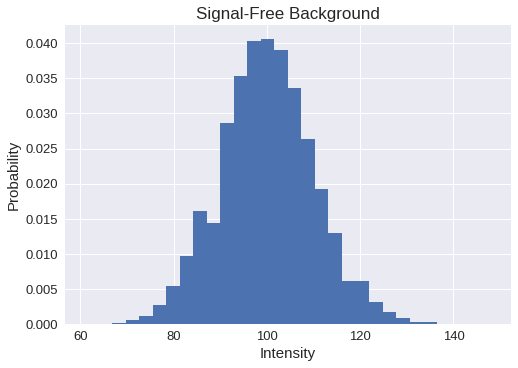

In [49]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True)
plt.xlabel("Intensity", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.title("Signal-Free Background", fontsize=17)
plt.tick_params(labelsize = 13)
plt.show()

### Problem 1

Where is the 5σ sensitivity threshold?

In [50]:
prob5sigma = stats.norm.cdf(5, loc=0, scale=1)
threshold_value = stats.poisson.ppf(prob5sigma, mu, loc=0)

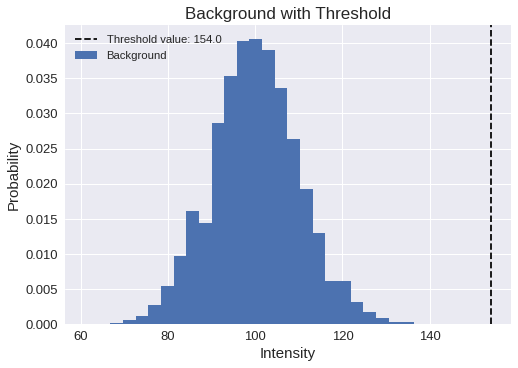

The 5σ threshold value is 154.0


In [51]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True, label='Background')
plt.axvline(threshold_value, color='k', linestyle='--', label="Threshold value: "+str(threshold_value))

ax.set_xlabel("Intensity", fontsize=15)
ax.set_ylabel("Probability", fontsize=15)
ax.set_title("Background with Threshold", fontsize=17)
ax.legend(loc=0, fontsize=11.3)
plt.tick_params(labelsize = 13)
plt.show()

print("The 5σ threshold value is "+str(threshold_value))

### Problem 2

Now inject a signal (8-30σ range) of known strength into the background many times.

In [52]:
prob_signal = stats.norm.cdf(8, loc=0, scale=1)
val_signal = stats.poisson.ppf(prob_signal, mu)
print("The injected signal has a strength of "+str(val_signal)+" (8σ)")

The injected signal has a strength of 190.0 (8σ)


In [53]:
inject = np.zeros(100000)
for i in range(5000):
    inject[(np.random.randint(0, 100000))] = val_signal

**a) Histogram how bright the observed signal appears to be, and discuss it's shape.**

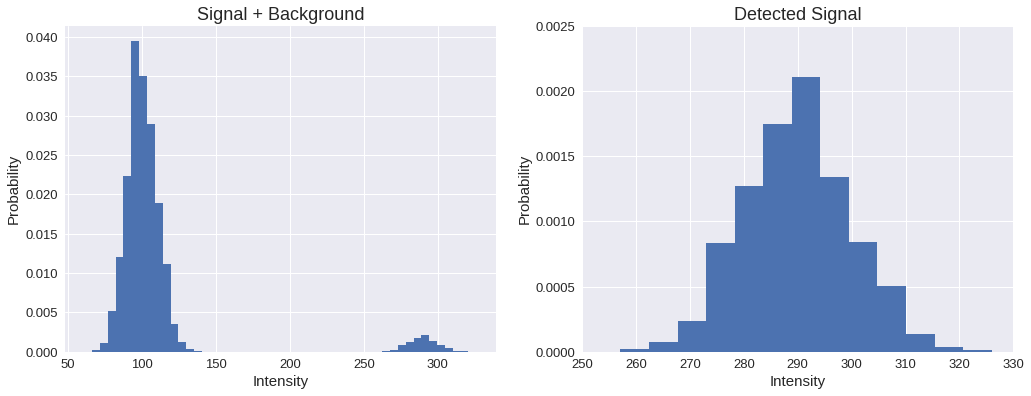

In [54]:
data = background + inject

fig, ax = plt.subplots(1,2, figsize=(17,6))
ax[0].hist(data, bins=50, density=True)
ax[0].set_title("Signal + Background", fontsize=18)
ax[0].set_xlabel("Intensity", fontsize=15)
ax[0].set_ylabel("Probability", fontsize=15)
ax[0].tick_params(labelsize = 13)


ax[1].hist(data, bins=50, density=True)
ax[1].set_xlim([250, 330])
ax[1].set_ylim([0, 0.0025])
ax[1].set_title("Detected Signal", fontsize=18)
ax[1].set_xlabel("Intensity", fontsize=15)
ax[1].set_ylabel("Probability", fontsize=15)
ax[1].tick_params(labelsize = 13)
plt.show()

*Left plot:* The original background can be seen in the stronger histogram, and the injected signal plus the background can be seen in the weaker histogram. The histogram of the signal shows the distribution of a random number of signals injected (added to the background). The background peaks at 100 and the injected signal has a value of 190; sometimes the background adds to the signal, creating values larger than 290, and sometimes it subtracts, creating smaller values. However, the chance of detecting the value of 290 is still less than detecting the background, and there's zero chance of detecting anything between 150-250.

*Right plot:* The same data with different bounds to better show the signal

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

The signal is biased, as it is not always equally likely to observe a value stronger or weaker than the true signal - there's a gap where no signal is detected at all, and detecting 100 is still the most probable. When I zoom in around the signal itself, the distribution is symmetric around 290, as it should be, and the observed value is always greater than the injected signal of 190.

### Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

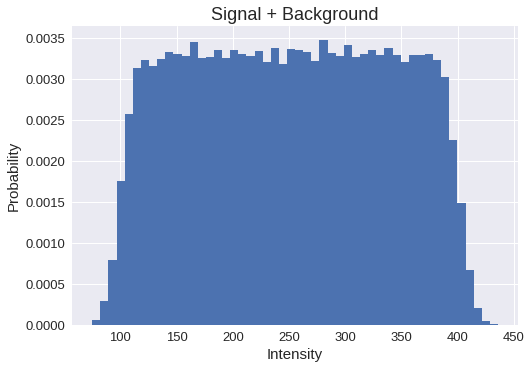

In [55]:
signal_strength = 302
signal_inject = stats.uniform.rvs(loc=0, scale=signal_strength, size=100000)

data = signal_inject + background

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=50, density=True)
plt.title("Signal + Background", fontsize=18)
ax.set_xlabel("Intensity", fontsize=15)
ax.set_ylabel("Probability", fontsize=15)
plt.tick_params(labelsize = 13)
plt.show()

The above plot shows the new injected signal plus the background. This time the signal was uniform and injected at every point, and there are no gaps. The data is much more symmetric and less biased.

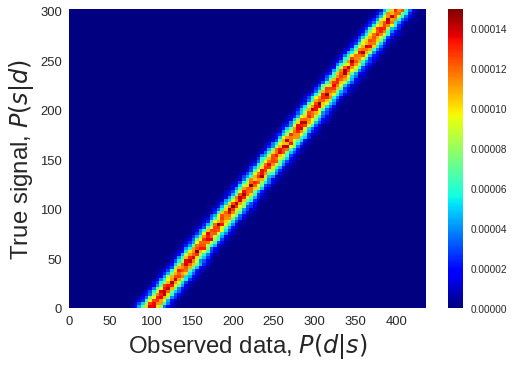

In [56]:
# set some values to avoid hardcoding
array_size = 100
data_max = round(np.sort(data)[-1])

# define bounds
signaledges = np.linspace(0, signal_strength, array_size) # y
dataedges = np.linspace(0, data_max, array_size) # x

# true signal
Psd, temp, temp2 = np.histogram2d(data, signal_inject, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T, cmap=plt.cm.jet, shading='auto')
plt.colorbar()
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.tick_params(labelsize = 13)
plt.show()

**b) For the same injected signal power as in problem 2, show that you get the same answer.**

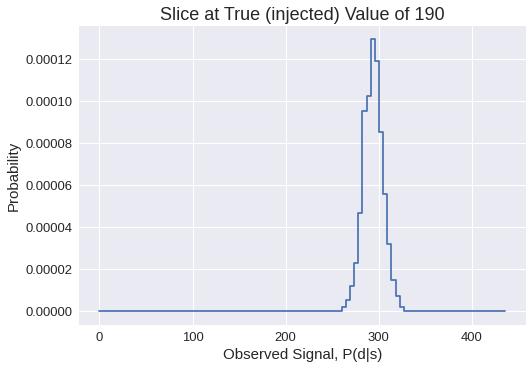

In [57]:
Pds = Psd.T

index = 63
no_bins = array_size / signal_strength
val = index/no_bins

x = np.linspace(dataedges[0], dataedges[-1], len(Pds[index]))
plt.step(x, Pds[index], where='mid')

plt.ylabel("Probability", fontsize=15)
plt.xlabel("Observed Signal, P(d|s)", fontsize=15)
plt.title("Slice at True (injected) Value of "+str(round(val)), fontsize=18)
plt.tick_params(labelsize = 13)
plt.show()

The above plot shows a horizonal slice at the injected value of 190; the distribution shows the chance of observing a value given a true signal. It has a lower probability than part 2 (i.e the peak has a probability of 0.00012 instead of 0.002), but peaks at the same value (290). 

**c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.**

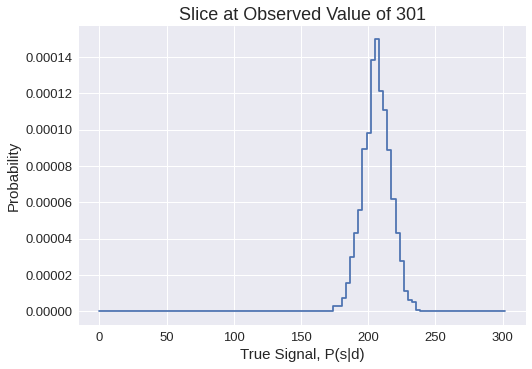

An observed value of 300 corresponds to a true signal with the above distribution that peaks at 206.47.


In [58]:
fig, ax = plt.subplots(1,1)

index = 69
no_bins = array_size / data_max
val = index/no_bins

x = np.linspace(signaledges[0], signaledges[-1], len(Psd[index]))
plt.step(x, Psd[index], where='mid')

plt.xlabel("True Signal, P(s|d)", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.title("Slice at Observed Value of "+str(round(val)), fontsize=18)
plt.tick_params(labelsize = 13)
plt.show()

avg_true_signal = x[np.where(Psd[index] == max(Psd[index]))][0]
print("An observed value of 300 corresponds to a true signal with the above distribution that peaks at "+str(round(avg_true_signal,2))+".")

This plot shows the distribution of true signals for any observation. If you were to observe a value of 300, the true value of that measurement has a mean where this graph peaks -- 206.

**d) For your observed signal, what is the 1σ uncertainty on the true signal strength?**

In [62]:
# probability of 1 sigma uncertainty (34%)
prob1sigma = (stats.norm.cdf(1, loc=0, scale=1) - stats.norm.sf(1, loc=0, scale=1)) / 2

# maximum value of observed signal
peak_x_val = np.where(Psd[index] == max(Psd[index]))[0][0]

print("The 1σ probability value is "+str(round(prob1sigma,4)))

The 1σ probability value is 0.3413


In [60]:
prob_sum = 0
for i in range(len(Psd[index]) - peak_x_val):
    prob_sum = prob_sum + Psd[index][peak_x_val+i]
    if prob_sum >= np.sum(Psd[index])*prob1sigma:
        sig1_x_val = peak_x_val+i
        pos_uncertainty = x[sig1_x_val] - avg_true_signal
        break
        
print("The +1σ uncertainty is "+str(round(pos_uncertainty,3)))

The +1σ uncertainty is 6.163


In [61]:
prob_sum = 0
for i in range(len(Psd[index]) - peak_x_val):
    prob_sum = prob_sum + Psd[index][peak_x_val-i]
    if prob_sum >= np.sum(Psd[index])*prob1sigma:
        sig1_x_val = peak_x_val-i
        neg_uncertainty = x[sig1_x_val] - avg_true_signal
        break
        
print("The -1σ uncertainty is "+str(round(neg_uncertainty,3)))

The -1σ uncertainty is -6.163


The uncertainty of the measurement is 206.45$\pm$6.16

**e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?**

The observed value is always likely to be greater than the true injected signal (observed 300, true 206.45$\pm$6.16), so the measurement is biased. The uncertainty is symmetric, with 1 sigma values at 6.16 data points above and below the mean.